# MN-interaction diagram

*MNclass* analyses the stresses and strains within a concrete section and enables to generate MN-interaction diagrams. Different material properties and sections can be incorporated.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, 'libraries')
import rc
import sections as sect
import materials as mat
import utils

## Define materials

### Concrete

Three ways to define concrete material properties are available. C50/60 concrete with characteristic cylinder strength of 50 MPa is analysed in this example.

In [2]:
f_ck = 50 # MPa

#### Concrete equivalent stress block

This model is defined using *esb1* material class. The strength of the material is generally reduced by a factor $\alpha$, recommended as 0.85. The depth of the equivalent stress block $\lambda$ is 0.8. The peak compressive strain $\epsilon_u$ is recommended as 0.0035.

![image](assets/images/equivalent_stress_block.png)

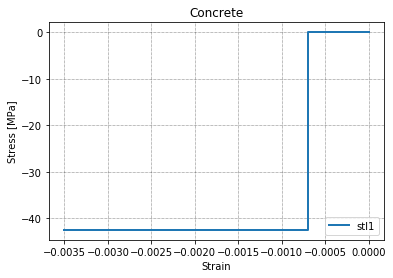

In [3]:
conMat = mat.esb1(ID = 'concrete EC2', fu = f_ck*0.85, epsilon_u = 0.0035, plotting=True, title="Concrete")
conMat.data_frame()

#### Concrete as elastic perfectly plastic material

This model is defined using *stl1* material class.

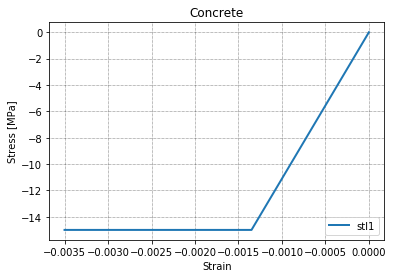

,ID,$$E_{1}[MPa]$$,$$E_{2}[MPa]$$,$$f_{y}[MPa]$$,$$f_{u}[MPa]$$,$$e_{y}$$,$$e_{u}$$,$$mu$$
concrete stl1,concrete stl1,11111,0.0,15,15,0.00135,0.0035,0.0


In [4]:
conMat = mat.stl1('concrete stl1', 11111, 15, 15, 0.0035,title="Concrete",plotting=True,tension=False)
conMat.data_frame()

#### Concrete as a trilinear curve model in compression and tensile stage given by a bilinear curve with softening. 

This model is defined using *con1* material class. 

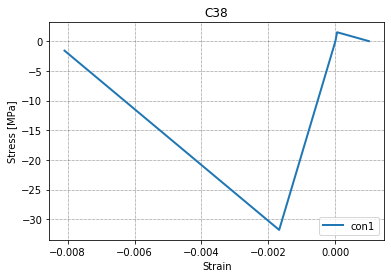

,ID,$$h[mm]$$,$$f_{c1}[MPa]$$,$$f_{c2}[MPa]$$,$$f_{t}[MPa]$$,$$E_{c0}[MPa]$$,$$E_{c1}[MPa]$$,$$E_{c2}[MPa]$$,$$E_{t1}[MPa]$$,$$E_{t2}[MPa]$$,$$G_{f}[N/mm]$$,$$G_{c}[N/mm]$$,$$e_{c1}$$,$$e_{c2}$$,$$e_{t1}$$,$$e_{t2}$$,$$alpha$$
C38,C38,250,31.8,1.6,1.5,31600,18900,-4700,31600,-1600,0.136,34.0,0.00168,0.00809,5e-05,0.001,0.67


In [25]:
conMat = mat.con1('C38', 38.2/1.2, 250, epsilon_t2 = 0.001, fc2_factor = 0.05, ft_factor = 0.5, 
                 characteristic = False, plotting=True,title="C38")
conMat.data_frame()

### Reinforcement

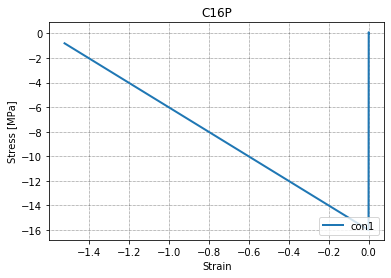

,ID,$$h[mm]$$,$$f_{c1}[MPa]$$,$$f_{c2}[MPa]$$,$$f_{t}[MPa]$$,$$E_{c0}[MPa]$$,$$E_{c1}[MPa]$$,$$E_{c2}[MPa]$$,$$E_{t1}[MPa]$$,$$E_{t2}[MPa]$$,$$G_{f}[N/mm]$$,$$G_{c}[N/mm]$$,$$e_{c1}$$,$$e_{c2}$$,$$e_{t1}$$,$$e_{t2}$$,$$alpha$$
C16P,C16P,250,16,0.8,0.1,28800,17200,-10.0,28800,-100,0.129,32.2,0.00093,1.52093,0.0,0.001,0.67


In [26]:
concr = mat.con1('C16P', 16, 250, epsilon_t2 = 0.001, fc2_factor = 0.05, ft_factor = 0.1/2.5, characteristic = True,title="C16P",Ec2=-1E+1, Et2='')
concr.data_frame()

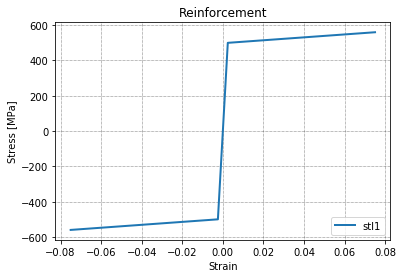

,ID,$$E_{1}[MPa]$$,$$E_{2}[MPa]$$,$$f_{y}[MPa]$$,$$f_{u}[MPa]$$,$$e_{y}$$,$$e_{u}$$,$$mu$$
reinforcement,reinforcement,205000,826.9,500,560,0.00244,0.075,0.0040337


In [6]:
reinfMat = mat.stl1('reinforcement', 205000, 500, 560, 0.075,title="Reinforcement",plotting=True,tension=True)
reinfMat.data_frame()

## Define sections

The sections can be defined as rectangular or T-sections. The reinforcement across the section width is unifrmly distributed across its width on the plots and is only informative.

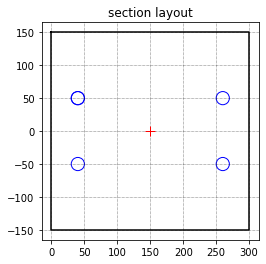

In [7]:
reinf_sect = [[2, 20, 40],[2,20,260]]
section=sect.rcrs(300,300,reinf_sect, plotting = True)

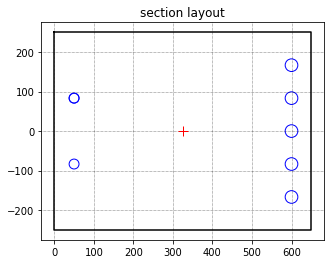

In [8]:
reinf_sect = [[5, 32, 600],[2,25,50]]
section=sect.rcrs(500,650,reinf_sect, plotting = True)

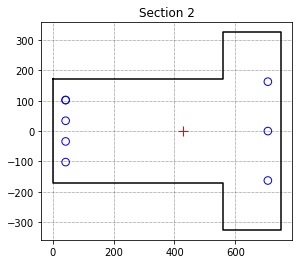

In [19]:
reinf_sect = [[3, 25, 707.5], [4, 25, 42.5]]
section=sect.rcts(190,560,650,340,reinf_sect,title='Section 2')

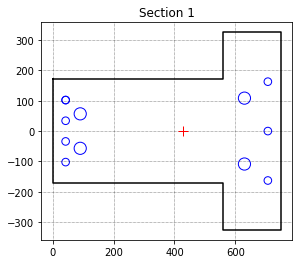

In [20]:
reinf_sect = [[3, 25, 707.5], [4, 25, 42.5], [2, 40, 90], [2, 40, 630]]
section=sect.rcts(190,560,650,340,reinf_sect,title='Section 1')

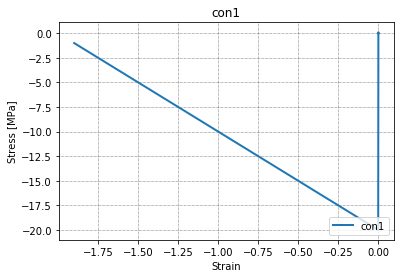

,ID,$$h[mm]$$,$$f_{c1}[MPa]$$,$$f_{c2}[MPa]$$,$$f_{t}[MPa]$$,$$E_{c0}[MPa]$$,$$E_{c1}[MPa]$$,$$E_{c2}[MPa]$$,$$E_{t1}[MPa]$$,$$E_{t2}[MPa]$$,$$G_{f}[N/mm]$$,$$G_{c}[N/mm]$$,$$e_{c1}$$,$$e_{c2}$$,$$e_{t1}$$,$$e_{t2}$$,$$alpha$$
C50_60,C50_60,250,41.7,2.1,1.8,34600,20700,-7700,34600,-1900,0.143,35.8,0.00201,0.00717,5e-05,0.001,0.67


In [10]:
concr = mat.con1('C50_60', 20, 250, epsilon_t2 = 0.001, fc2_factor = 0.05, 
                  ft_factor = 0.1/2.8, characteristic = True,Ec2=-1E+1, Et2='')
conMat.data_frame()

## Strains and stresses within section

Positive moment indicates compression close to 0 x-coordinate and tension in the most furthest fibre on the x-axis.

In [11]:
MNclass=rc.MNclass(conMat,reinfMat,section)

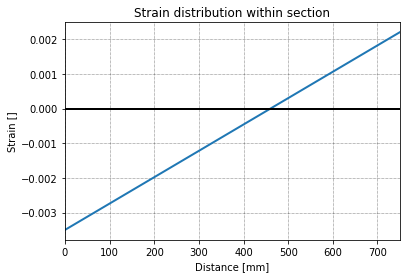

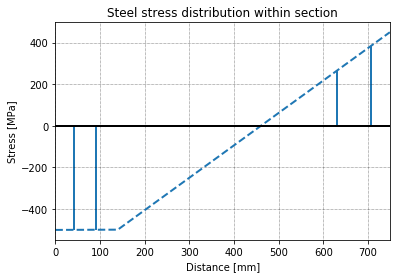

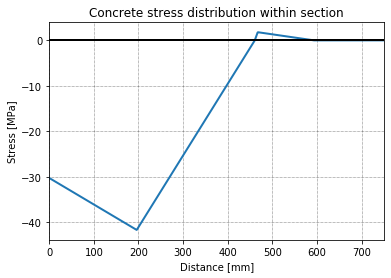

Total axial force: -5247 kN
Total moment: 1872 kNm


In [12]:
f_tot,m_tot=MNclass.calc(eps0=-0.0035,epsH=0.0022, plotting=True,n_layers=800)

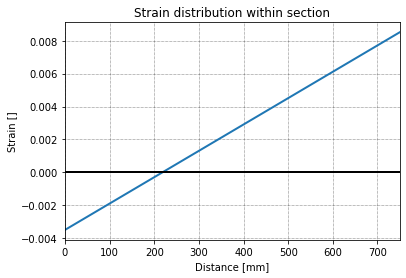

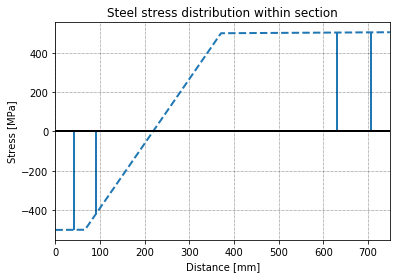

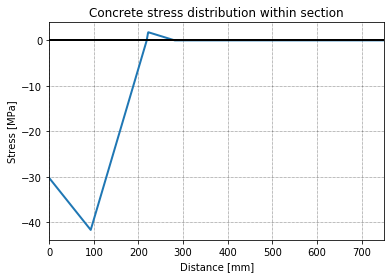

Total axial force: -2046 kN
Total moment: 1782 kNm


In [13]:
f_tot,m_tot=MNclass.calcX0(eps0=-0.0035,x_NA=218.5, plotting=True,n_layers=1000)

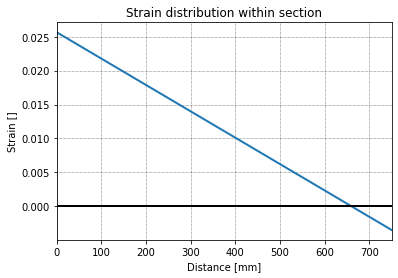

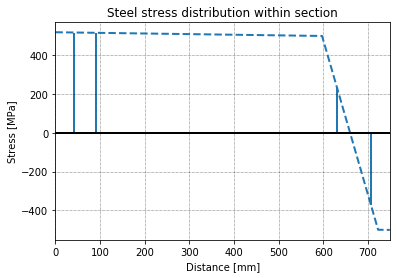

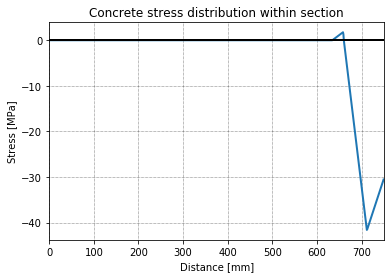

Total axial force: 791 kN
Total moment: -1272 kNm


In [14]:
f_tot,m_tot=MNclass.calcXH(epsH=-0.0035,x_NA=90, plotting=True,n_layers=800)

## MN cuve

libraries\utils.py:120: RuntimeWarning: invalid value encountered in greater_equal
  in_range= (T[0,:] >=0) & (T[1,:] >=0) & (T[0,:] <=1) & (T[1,:] <=1)
libraries\utils.py:120: RuntimeWarning: invalid value encountered in less_equal
  in_range= (T[0,:] >=0) & (T[1,:] >=0) & (T[0,:] <=1) & (T[1,:] <=1)


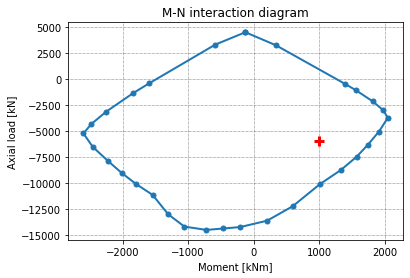

In [15]:
F_Ed = -6000 # kN
M_Ed = 1000 # kNm
mnInteraction = MNclass.mnCurve(xRatio=[0.05,0.16,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.3,2,5,1E99],n_layers=100,epsU=-0.0035,reverseMoment=False,F_Ed=F_Ed,M_Ed=M_Ed)

In [16]:
# Find exact moments at given axial load
axial = 0 # kN
find = utils.findExactPoint(np.array(mnInteraction).T,0,limY=False, multiple=True)
print('Exact moment at axial load axial {} kN are {} kNm and {} kNm'.format(axial,int(find[1][0]),int(find[1][1])))

Exact moment at axial load axial 0 kN are 1253 kNm and -1475 kNm
